In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.spatial.distance as dis

# Różne odległości

# euclidean

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean

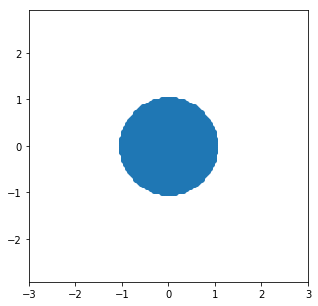

In [8]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.euclidean([0,0],[i,j]) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# cityblock

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cityblock.html#scipy.spatial.distance.cityblock

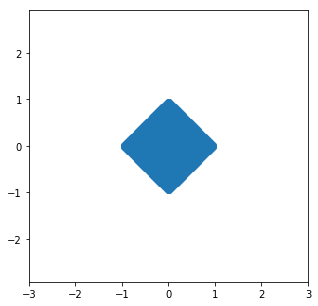

In [9]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.cityblock([0,0],[i,j]) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# minkowski

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html#scipy.spatial.distance.minkowski

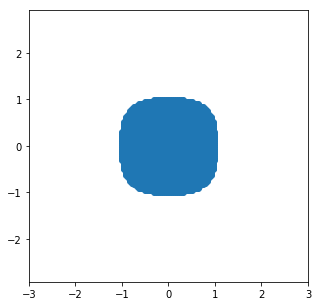

In [10]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.minkowski([0,0],[i,j], p=3 ) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# mahalanobis

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html#scipy.spatial.distance.mahalanobis

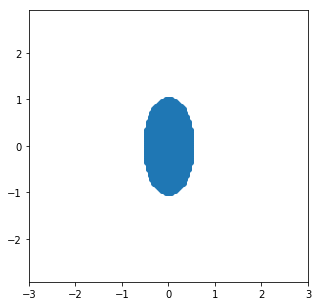

In [11]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], [[4,0],[0,1]] ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

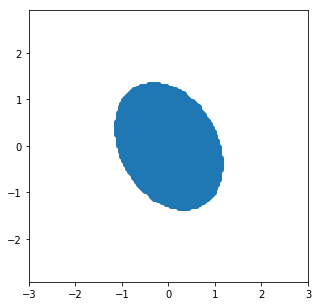

In [12]:
theta = np.pi/3
V = np.linalg.inv(
    np.dot(np.dot(np.transpose([[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]]) , [[2,0],[0,1]]),
           [[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]] 
))

# http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], V ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()


# cosine

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine

https://en.wikipedia.org/wiki/Cosine_similarity

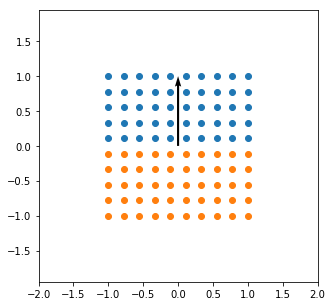

In [13]:
data = []
data1 = []
for i in np.linspace(-1., 1.0, num=10):
    for j in np.linspace(-1., 1.0, num=10):
        if( dis.cosine([0,1],[i,j]) < 1 ):
            data.append( [i,j] )
#         print(dis.cosine([0.1,0.1],[i,j]))
        else:
            data1.append( [i,j] )
#             print(1)
data = np.array(data)   
data1 = np.array(data1)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.scatter(data1[:,0], data1[:,1])
V = np.array([[0,1]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', scale=1)
plt.axis("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

# Zad

wykonaj algorytm kNN zodległościami

* metric='minkowski'
* metric='euclidean'
* metric='cosine'

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

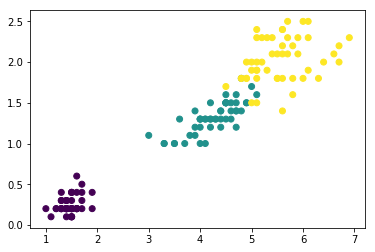

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

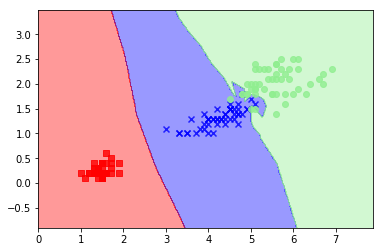

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from help_plot import plot_decision_regions

knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')
knn.fit(X, y)

plot_decision_regions(X, y, knn)
plt.show()

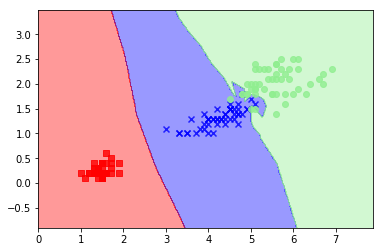

In [17]:
knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='euclidean')
knn.fit(X, y)

plot_decision_regions(X, y, knn)
plt.show()

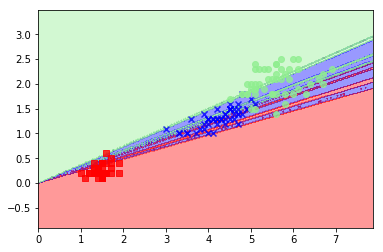

In [23]:
knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='cosine')
knn.fit(X, y)

plot_decision_regions(X, y, knn)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [26]:
X_S = scaler.fit_transform(X)

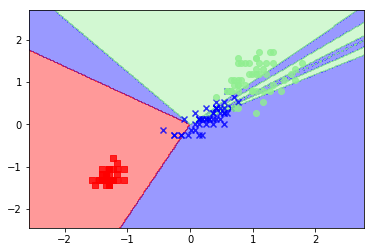

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_S, y)

plot_decision_regions(X_S, y, knn)
plt.show()